# Solving first order ODEs in Python: Part 1
## 2021-10-22
## Hyemin Gu

## First order ODEs and IVP
We want to solve a **first order ordinary differential equation** for a function $u$ of variable $t \in [0, \infty)$ which satisfies the equation of the form
$$\frac{du}{dt} = f(u, t) \text{ for } t \in (0, \infty).$$
If $u(0) = u_0$ is given, we call the problem an **initial value problem**.
A solution of IVP exists on a neighborhood of $t$ and is unique given $f$ is Lipshitz continuous. (Picard–Lindelöf theorem)

## Example problems
1. $\dot{u} = u$ : analytic solution $u(t) = u_0e^t$
2. $\dot{u} = 1-u^2$ : analytic solution $u(t) =\frac{(u_0+1)e^{2t}+u_0-1}{(u_0+1)e^{2t}-(u_0-1)}$ <br>
Different behavior when $u_0$ > 1, =1, <1
3. A model of fishery $\dot{u} = u(1-u)-h$
4. Improved model of a fishery $\dot{u} = u(1-u)-h\frac{u}{a+u}$
5. Plane dynamics $\dot{x} = y, \dot{y} = -4x$

## Plot a 2D phase portrait in Python
First, generate 2D gridpoints using `numpy.meshgrid` and <br>then plot vector field using `matplotlib.pyplot.quiver`. <br>
`X, Y = numpy.meshgrid(x, y)` <br>
`matplotlib.pyplot.quiver(X, Y, U, V)`

See example 5.

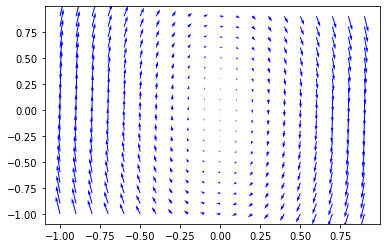

In [11]:
def f5(x, y):
    return y, -4*x

import numpy as np
import matplotlib.pyplot as plt

X, Y = np.meshgrid(np.arange(-1,1, 0.1), np.arange(-1,1, 0.1))
U, V = f5(X, Y)
plt.quiver(X, Y, U, V, color='blue')
plt.show()

## Discretization of equation and domain
To solve IVP using computer, we **discretize** both the domain $t \in [0, \infty)$ and the equation. Then, find a solution to this discretized problem which is an approximate solution to the original problem.

First, discretize the domain:
* Let $t_n = n*dt$ for a constant $dt$ for each $n=0,1,2,\cdots$
* Here, $dt$ is the time step.
* Let the approximated solution $u_n\approx u(t_n)$.

Then, discretize the equation:
* Forward Euler: Approximate $\frac{du}{dt}\approx \frac{u_{n+1}-u_n}{dt}$. 
     * The discretized equation is $u_{n+1} = u_n+dt*f(u_n)$. <br>
     * Given an initial condition $u_0$, this explicit equation can be solved iteratively. <br>
     * Order of approximation: $O(dt)$
* Backward Euler, …

## Python code for Forward Euler

In [12]:
def FE(f, dt, tn, u0, parms=None):
    """Solve u=f(u; parms)
       f: callable, dt: float, tn: float, u0: float, parms: iterable
       u, t: numpy 1D array of length n+1"""
    import numpy as np
    
    n = int(tn/dt)
    u = np.zeros((n+1))
    t = np.arange(start=0, stop=tn+dt, step=dt)
    u[0]=u0
    
    for i in range(n):
        u[i+1] = u[i] + dt*f(u[i], parms)
    
    return u, t

In [13]:
# define vector fields
def f1(x, parms=None):
    return x
def f2(x, parms=None):  # Try IC > 1, =1, <1
    return 1-x**2
def f3(x, parms): # a model of a fishery
    h = parms[0]
    return x*(1-x)-h
def f4(x, parms): # Improved model of a fishery
    h = parms[0]
    a = parms[1]
    return x*(1-x)-h*x/(a+x)    

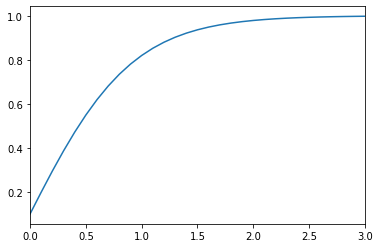

In [17]:
import matplotlib.pyplot as plt

u0 = 0.1
tn = 3
dt = 0.1

u,t = FE(f2, dt, tn, u0)  # modify to test on f2 with u0>1, =1, <1
plt.plot(t, u)
plt.xlim((0,tn))
plt.show()

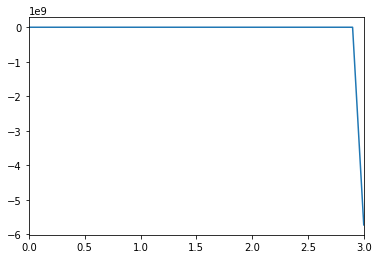

In [20]:
# A model of fishery: f3
"""h<1/4 : two scenarios for IC<<1, IC>smaller equilibrium point
   h>1/4 : decrease anyway"""
import matplotlib.pyplot as plt

h = 0.3
u0 = 0.1
tn = 3
dt = 0.1

u,t = FE(f3, dt, tn, u0, (h,))
plt.plot(t, u)
plt.xlim((0,tn))
plt.show()

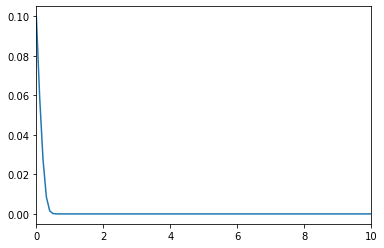

In [24]:
# Improved model of fishery: f4
"""Check the dynamics near 0
   0 is stable if a>1 & h>a 
   0 is unstable if h<a
   0 is stable if a<1 & h>a""" 
import matplotlib.pyplot as plt
a = 0.1
h = 1
u0 = 0.1
tn = 10

u,t = FE(f4, 0.1, tn, u0, (h, a))
plt.plot(t, u)
plt.xlim((0,tn))
plt.show()

## Python module for Higher order methdods
Compare the order of accuracies of different methods.

<table>
    <tr>
        <td>
\begin{array}{rc}
            Forward Euler & O(h) \\
            Backward Euler & O(h) \\
            Central difference & O(h^2) \\
            RK23 & O(h^2) \\
            RK45 & O(h^4)
\end{array}
        </td>
    </tr>
</table>

Test higher order methods using the Python module: `scipy.integrate.solve_ivp`. <br>
`scipy.integrate.solve_ivp(fun, t_span, y0, method = 'RK45')`

In [25]:
"""define vector fields to provide input to solve_ivp
   solve_ivp assumes solving general non-autonumous ODEs with variable t"""
def f1_(t, x, parms=None):
    return x
def f2_(t, x, parms=None):  # Try IC > 1, =1, <1
    return 1-x**2
def f3_(t, x, h): # a model of a fishery
    return x*(1-x)-h
def f4_(t, x, h, a): # Improved model of a fishery
    return x*(1-x)-h*x/(a+x)    
def f5_(t, z):
    x, y = z
    return y, -4*x

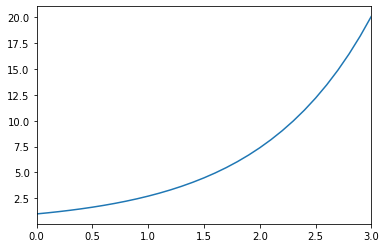

In [26]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

dt=0.1
tn=3
u0 = 1

sol = scipy.integrate.solve_ivp(f1_, (0, tn), (u0,), method = 'RK45', t_eval = np.arange(0, tn+dt, dt))

plt.plot(sol.t, sol.y[0])
plt.xlim((0,tn))
plt.show()

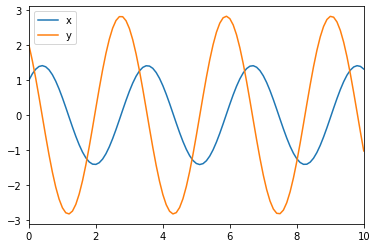

In [4]:
# 2D example: periodic
u0 = 1
v0 = 2
tn = 10
dt = 0.1

sol = scipy.integrate.solve_ivp(f5_, (0, tn), (u0,v0), method = 'RK45', t_eval = np.arange(0, tn+dt, dt))

plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.xlim((0,tn))
plt.legend(('x', 'y'))
plt.show()

## Remaining things that you could do

* Take an example including parameters and see the bifurcation behaviors.
* Improve the models of fisheries.
* Take your owvn domain-specific problem, solve it and interpret the result.

## Summary
* discussed numerical methods to solve IVPs for ODEs,
* learned to implement / use an ODE solver in Python, 
* and tested to some examples

In the next video, we would handle more complicated problems such as SIR, Lorenz equations using `solve_ivp`.